In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Draw the lines represented in the hough accumulator on the original image
def drawhoughLinesOnImage(image, houghLines):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(image,(x1,y1),(x2,y2),(0,255,0), 2)   

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

In [3]:
image = cv2.imread("sudoku.jpg") # load image in grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)

# Detect points that form a line
dis_reso = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi /180 # Angular resolution in radians of the Hough grid
threshold = 170# minimum no of votes

houghLines = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)

houghLinesImage = np.zeros_like(image) # create and empty image

drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image) # add two images together, using image blending

(-0.5, 319.5, 320.5, -0.5)

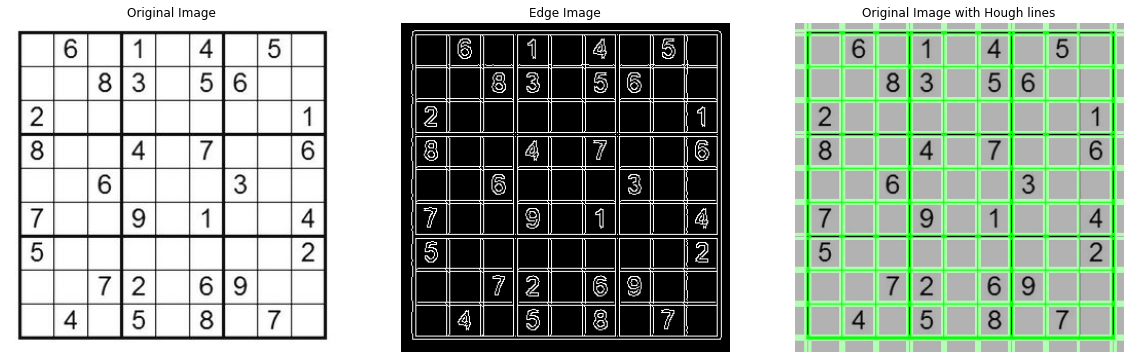

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(edgeImage, cmap='gray')
ax2.set_title('Edge Image')
ax2.axis('off')

ax3.imshow(orginalImageWithHoughLines, cmap='gray')
ax3.set_title("Original Image with Hough lines")
ax3.axis('off')